In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
Data = np.loadtxt('../source/sms.txt', dtype = int, skiprows = 1)
N, dp1 = Data.shape
d = dp1 - 1
print(N, d)

5574 560


In [112]:
Data[2][-1]

1

In [113]:
type(Data[2][2])

numpy.int32

In [115]:
print(np.count_nonzero(Data[:, -1] == 0))
print(np.count_nonzero(Data[:, -1] == 1))

4827
747


In [116]:
X = Data[:, 1:dp1]
y = Data[:, -1]

In [117]:
X.shape

(5574, 560)

In [118]:
y.shape

(5574,)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [123]:
#from sklearn.naive_bayes import BernoulliNB
#nb_model = BernoulliNB()
#nb_model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [128]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [125]:
#from sklearn.naive_bayes import GaussianNB
#nb_model = MultinomialNB()
#nb_model.fit(X_train, y_train)

In [129]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.0102870813397
0.019368723099


In [130]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(y_test_pred, y_test)
print(CF)

[[1180    4]
 [  23  187]]


$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

${\rm TN}$ – true negative
${\rm FP}$ – false positive
${\rm FN}$ – false negative
${\rm TP}$ – true positive


${\rm FP}$ – _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – вероятность ошибки первого рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – вероятность ошибки второго рода

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

${\rm TPR} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_ (вероятность предсказать отсутствие болезни, при условии, что ее нет)


In [131]:
fpr = float(CF[1, 0])/(CF[0, 0] + CF[1, 0])
fnr = float(CF[0, 1])/(CF[0, 1] + CF[1, 1])
print(fpr, fnr)

0.0191188694929 0.020942408377


In [132]:
tnr = 1 - fpr
tpr = 1 - fnr
print(tnr, tpr)

0.980881130507 0.979057591623


## ROC-кривая

In [133]:
from sklearn.metrics import roc_curve
proba = nb_model.predict_proba(X_test)[:, 1]

In [134]:
nb_model.predict_proba(X_test).shape

(1394, 2)

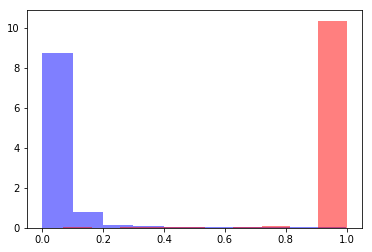

In [135]:
plt.hist(proba[y_test == 0], color = 'b', alpha = 0.5, normed = True)
plt.hist(proba[y_test == 1], color = 'r', alpha = 0.5, normed = True)
pass

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, proba)

In [137]:
fpr.shape

(119,)

[-0.05, 1.05, -0.05, 1.05]

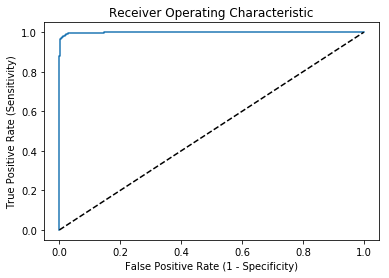

In [138]:
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

In [139]:
fpr_max = 0.025 # Зададим порог для fpr. Определим, чему должен быть равен tpr (fnr)
for i in range(len(thresholds) - 1):
    if fpr[i] <= fpr_max and fpr[i + 1] > fpr_max:
        print(thresholds[i], fpr[i], 1-tpr[i])

0.418487101246 0.0224438902743 0.0104712041885


In [140]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9985681520457147